# Preprocessing Example (Feature Scaling)
### SHREY BATRA

**In this notebook, we will be trying to see a little bit about pre processing techniques (mostly Feature Scaling), why tey are useful and when and where to use them.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 7]

**You can download the dataset from this link - **

In [2]:
X_test = pd.read_csv('/home/shreybatra/Downloads/Loan_Prediction_Data/X_test.csv')
X_train = pd.read_csv('/home/shreybatra/Downloads/Loan_Prediction_Data/X_train.csv')
y_test = pd.read_csv('/home/shreybatra/Downloads/Loan_Prediction_Data/Y_test.csv')
y_train = pd.read_csv('/home/shreybatra/Downloads/Loan_Prediction_Data/Y_train.csv')

In [3]:
X_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001032,Male,No,0,Graduate,No,4950,0.0,125,360,1,Urban
1,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123,480,1,Semiurban
2,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56,180,1,Semiurban
3,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112,360,1,Urban
4,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136,360,1,Urban


In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 12 columns):
Loan_ID              384 non-null object
Gender               384 non-null object
Married              384 non-null object
Dependents           384 non-null object
Education            384 non-null object
Self_Employed        384 non-null object
ApplicantIncome      384 non-null int64
CoapplicantIncome    384 non-null float64
LoanAmount           384 non-null int64
Loan_Amount_Term     384 non-null int64
Credit_History       384 non-null int64
Property_Area        384 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 36.1+ KB


**We will be working only with numerical data just to showcase for feature scalaing works, for now.**

In [5]:
X_test = X_test[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
X_train = X_train[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]

**Let's just see the variation in our dataset first.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd69b3d438>,
      dtype=object)

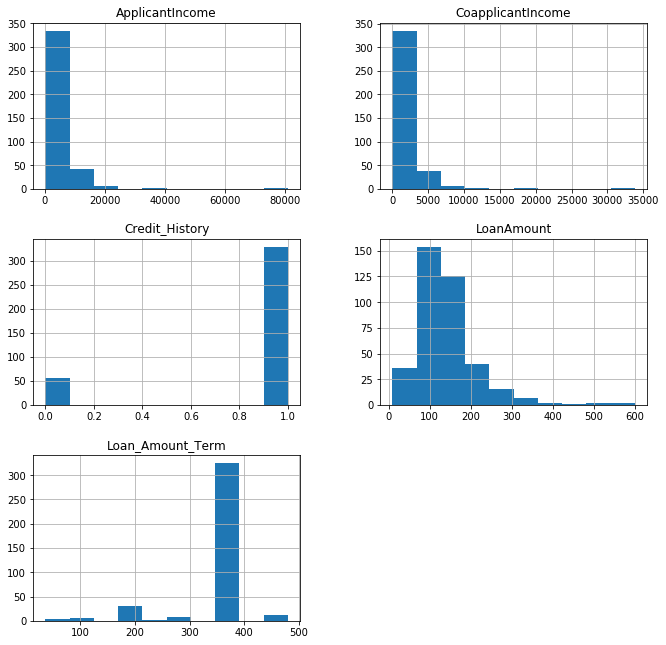

In [6]:
X_train.hist(figsize=[11,11])

**After understanding these plots, we infer that ApplicantIncome and CoapplicantIncome are in similar range (0-50000 dollars) where as LoanAmount is in thousands and it ranges from 0 to 600 dollars. The story for Loan_Amount_Term is completely different from other variables because its unit is months as opposed to other variables where the unit is dollars.**

**If we try to apply distance based methods such as kNN (to find the nearest similarity) on these features, feature with the largest range will dominate the outcome results and we’ll obtain less accurate predictions. We can overcome this trouble using feature scaling.**

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
X_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,4950,0.0,125,360,1
1,2882,1843.0,123,480,1
2,3000,3416.0,56,180,1
3,9703,0.0,112,360,1
4,2333,2417.0,136,360,1


**Let's define a model that will take the 5 nearest neighbours to predict the outcome.**

In [9]:
model = KNeighborsClassifier(n_neighbors=5)

In [10]:
model.fit(X_train,y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
accuracy_score(y_test, model.predict(X_test))

0.6145833333333334

**We got around 61% of correct prediction which is not bad but in real world practices will this be enough ? Why did we get a low accuracy like this? This might be happening because of some insignificant variable with larger range will be dominating the objective function. We can remove this problem by scaling down all the features to a same range. sklearn provides a tool MinMaxScaler that will scale down all the features between 0 and 1. Mathematical formula for MinMaxScaler is - **

**Xnorm = (X - Xmin) / (Xmax - Xmin)**

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
mms_scalar = MinMaxScaler()

In [15]:
X_train_pre = mms_scalar.fit_transform(X_train)
X_test_pre = mms_scalar.fit_transform(X_test)

In [16]:
model.fit(X_train_pre, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [17]:
accuracy_score(y_test, model.predict(X_test_pre))

0.75

**Great !! Our accuracy has increased from 61% to 75%. This means that some of the features with larger range were dominating the prediction outcome in the domain of distance based methods(kNN).**

**It should be kept in mind while performing distance based methods we must attempt to scale the data, so that the feature with lesser significance might not end up dominating the objective function due to its larger range. In addition, features having different unit should also be scaled thus providing each feature equal initial weightage and at the end we will have a better prediction model.**

### Now lets try this with Logistic Regression and see the results.

In [18]:
X_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,4950,0.0,125,360,1
1,2882,1843.0,123,480,1
2,3000,3416.0,56,180,1
3,9703,0.0,112,360,1
4,2333,2417.0,136,360,1


In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lg_model = LogisticRegression(C=0.01)

In [21]:
lg_model.fit(X_train, y_train.values.ravel())

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
accuracy_score(y_test, lg_model.predict(X_test))

0.6145833333333334

**Now let's fit the model using the scaled features and see the change in accuracy.**

In [23]:
lg_model.fit(X_train_pre, y_train.values.ravel())

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
accuracy_score(y_test, lg_model.predict(X_test_pre))

0.6354166666666666

**The accuracy we got after scaling is close to the prediction which we made by guessing, which is not a very impressive achievement. So, what is happening here? Why hasn’t the accuracy increased by a satisfactory amount as it increased in kNN?**

**In logistic regression, each feature is assigned a weight or coefficient (Wi). If there is a feature with relatively large range and it is insignificant in the objective function then logistic regression will itself assign a very low value to its co-efficient, thus neutralizing the dominant effect of that particular feature, whereas distance based method such as kNN does not have this inbuilt strategy, thus it requires scaling.**

**But then how to increase the accuracy?**

**Now, I’ll be introducing a new concept here called standardization. Many machine learning algorithms in sklearn requires standardized data which means having zero mean and unit variance.**

**Standardization (or Z-score normalization) is the process where the features are rescaled so that they’ll have the properties of a standard normal distribution with μ=0 and σ=1, where μ is the mean (average) and σ is the standard deviation from the mean.**

**Elements such as l1 ,l2 regularizer in linear models (logistic comes under this category) and RBF kernel in SVM in objective function of learners assumes that all the features are centered around zero and have variance in the same order.**

### Now lets use _scale_ provided in sklearn to standardise our data.

In [25]:
from sklearn import preprocessing

In [26]:
X_train_standardised = preprocessing.scale(X_train)
X_test_standardised = preprocessing.scale(X_test)

In [27]:
lg_model.fit(X_train_standardised, y_train.values.ravel())

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
accuracy_score(y_test, lg_model.predict(X_test_standardised))

0.75

**We again reached to our maximum score that was attained using kNN after scaling. This means standardizing the data when using a estimator having l1 or l2 regularization helps us to increase the accuracy of the prediction model. Other learners like kNN with euclidean distance measure, k-means, SVM, perceptron, neural networks, linear discriminant analysis, principal component analysis may perform better with standardized data.**